## Import libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pickle
from function_data_processing import *
from function_ML import *



pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

## Load data

In [2]:
data1 = pd.read_csv('/Users/yuriawano/fetal_health_classification/data/fetal_health_modeling.csv')
data1

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance,fetal_health
0,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,37.264136,-1.698371,7.49855,-0.229605,15.008226,1.339407,0.752864,53149.942412,4.672702,B
1,77.866926,-1.833548,-3.904537,-1.363542,-1.694483,10.777798,-1.698371,7.49855,-0.229605,22.632791,1.339612,2.228554,53149.942412,2.610067,A
2,78.384675,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,22.632791,1.339612,1.956520,53149.942412,2.698445,A
3,78.901899,-1.833548,-3.904537,-1.363542,-1.694483,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,3.221597,53149.942412,2.698445,A
4,77.866926,-1.833548,-3.904537,-1.363542,-1.677820,10.209278,-1.698371,7.49855,-0.229605,21.312087,1.339612,2.877034,53149.942412,2.514309,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,81.994480,-1.833548,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,11.309256,1.339612,1.639072,53149.942412,0.702658,B
2109,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.122632,B
2110,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.771841,-1.698371,7.49855,-0.229605,15.420003,1.339612,1.956520,53149.942412,1.424686,B
2111,81.994480,-1.850304,-3.904537,-1.363542,-1.677820,39.356632,-1.698371,7.49855,-0.229605,15.283736,1.339612,2.228554,53149.942412,1.424686,B


## Train the model

In [4]:
X = data1.drop('fetal_health', axis =1)
y = data1['fetal_health']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1690, 14), (423, 14), (1690,), (423,))

In [7]:
y_train.value_counts()

A    1305
B     238
C     147
Name: fetal_health, dtype: int64

## Scaling the imbalanced data: SMOTE
Scaling the imbalanced data of Training set only

In [8]:
smote = SMOTE()

X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

C    1305
A    1305
B    1305
Name: fetal_health, dtype: int64

In [9]:
X_train_sm

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
0,76.829840,-1.833548,-3.904537,-1.363542,-1.677820,21.615679,-1.698371,7.498550,-0.229605,13.413574,1.339612,2.228554,53149.942412,1.424686
1,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,15.637316,-1.698371,2.072439,-0.229605,9.456557,1.339612,0.000000,53149.942412,1.122632
2,72.659587,-1.833548,-3.904537,-1.363542,-1.677820,18.683316,-1.698371,5.280009,-0.229605,15.146484,1.339612,0.752864,53149.942412,1.424686
3,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.305597,-1.698371,0.842500,-0.229605,10.958094,1.339612,0.752864,53149.942412,0.702658
4,83.021340,-1.833548,-3.904537,-1.363542,-1.654421,33.422585,-1.698371,7.498550,-0.746032,23.892121,1.339612,2.877034,53149.942412,4.318061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3910,76.327347,-1.833548,-3.904537,-1.363542,-1.694483,17.176216,-1.698371,7.498550,-0.229605,23.636865,1.339612,3.587199,53149.942412,5.340251
3911,75.162295,-1.841043,-3.904537,-1.363542,-1.637704,27.106093,-1.698371,7.498550,-0.229605,21.867430,1.339612,1.689729,29599.342304,5.340912
3912,77.846535,-1.834207,-3.904537,-1.363542,-1.707287,17.662027,-1.698371,7.498550,-0.229605,18.416687,1.339612,1.348239,53149.942412,3.800214
3913,79.605096,-1.833548,-3.904537,-1.363542,-1.679992,34.558127,-1.698371,7.016653,-0.279723,16.406892,1.339612,0.789120,53149.942412,3.168307


In [10]:
X_test

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_mode,histogram_variance
596,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,38.522975,-1.698371,7.498550,-0.229605,13.564670,1.339612,0.752864,53149.942412,1.661337
1992,74.227625,-1.833548,-3.904537,-1.363542,-1.638326,31.680821,-1.698371,7.498550,-0.229605,19.021333,1.339612,2.228554,53149.942412,3.781944
422,71.611347,-1.833548,-3.904537,-1.363542,-1.677820,22.571797,-1.698371,7.498550,-0.229605,18.205688,1.339612,1.956520,53149.942412,2.294709
289,83.021340,-1.833548,-3.904537,-1.363542,-1.677820,32.118398,-1.698371,7.498550,-0.229605,16.985604,1.339612,3.376131,53149.942412,1.122632
196,84.557990,-1.833548,-3.904537,-1.363542,-1.677820,26.763105,-1.698371,1.505040,-0.229605,8.845061,1.339612,1.738371,53149.942412,1.122632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,79.418603,-1.833548,-3.904537,-1.363542,-1.677820,32.989253,-1.698371,3.867991,-0.229605,10.039637,1.339612,0.000000,53149.942412,0.000000
561,75.790601,-1.833548,-3.904537,-1.363542,-1.672667,23.988171,-1.698371,7.498550,-0.229605,24.454952,1.339612,3.221597,53149.942412,3.233810
438,84.046254,-1.833548,-3.904537,-1.363542,-1.677820,32.118398,-1.698371,3.867991,-0.229605,6.262482,1.339612,1.738371,53149.942412,3.219352
433,87.618558,-1.833548,-3.904537,-1.363542,-1.682980,30.359136,-1.698371,6.489261,-0.229605,24.454952,1.339612,3.376131,53149.942412,4.360620


## Scaling with standardization

In [12]:
transformer = StandardScaler().fit(X_train_sm)
x_standardized = transformer.transform(X_train_sm)

In [13]:
transformer = StandardScaler().fit(X_test)
x_standardized = transformer.transform(X_test)

In [14]:
X_train_sm.shape, X_test.shape

((3915, 14), (423, 14))

## Model evaluation 
Here we will test on Logistic Regression, KNN and Decision Tree

### Logistic regression

In [27]:
def model_comparison(X, y, K_value):
    
    print('Comparison 1. Logistic regression')
    # Logistic regression: accuracy score
    classification = LogisticRegression(random_state=42, max_iter=10000)
    classification.fit(X, y)
    
    print('1) Logistic regression score:', classification.score(X_test, y_test))
    
    # Confusion metrix
    print('2) Confustion metrix:')
    predictions = classification.predict(X_test)
    print(confusion_matrix(y_test, predictions))
    
    # Plot confusion metrix
    print('3) Confustion metrix plot: see bottom plot')
    cf_matrix = confusion_matrix(y_test, predictions)
    group_names = ['True A', 'False A', 'False A',
               'False B', 'True B', 'False B',
               'False C', 'False C', 'True C']

    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    print(sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues'))
    
    print('4) Classification report:')
    print(classification_report(y_test, classification.predict(X_test)))
    
    
    print('Comparison 2. KNN Classifier')
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))
    
    print('3) Comparison 3. Decision Tree')
    model = DecisionTreeClassifier()
    model.fit(X, y)
    print(model.score(X_test, y_test))
    
    
    


Comparison 1. Logistic regression
1) Logistic regression score: 0.7044917257683215
2) Confustion metrix:
[[245  44  52]
 [  6  33  15]
 [  3   5  20]]
3) Confustion metrix plot: see bottom plot
AxesSubplot(0.125,0.125;0.62x0.755)
4) Classification report:
              precision    recall  f1-score   support

           A       0.96      0.72      0.82       341
           B       0.40      0.61      0.49        54
           C       0.23      0.71      0.35        28

    accuracy                           0.70       423
   macro avg       0.53      0.68      0.55       423
weighted avg       0.84      0.70      0.75       423

Comparison 2. KNN Classifier
1) KNN Classifier accuracy score:
0.7990543735224587
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.97      0.79      0.87       341
           B       0.49      0.80      0.61        54
           C       0.43      0.89      0.58        28

    accuracy     

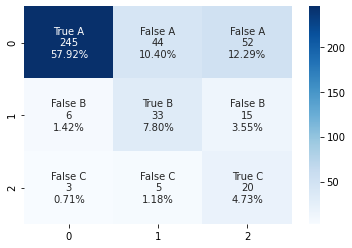

In [28]:
model_comparison(X_train_sm, y_train_sm, 20)

### KNN-Algorithm

#### Hyperparatemer: find the perfect K value

In [18]:
scores = []
for i in range(1,30,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    scores.append((metrics.accuracy_score(y_test, y_pred)))
scores

[0.900709219858156,
 0.8605200945626478,
 0.8416075650118203,
 0.817966903073286,
 0.817966903073286,
 0.8132387706855791,
 0.8037825059101655,
 0.8085106382978723,
 0.8085106382978723,
 0.789598108747045,
 0.7919621749408984,
 0.7801418439716312,
 0.7777777777777778,
 0.7706855791962175,
 0.7659574468085106]

Text(0, 0.5, 'Accuracy')

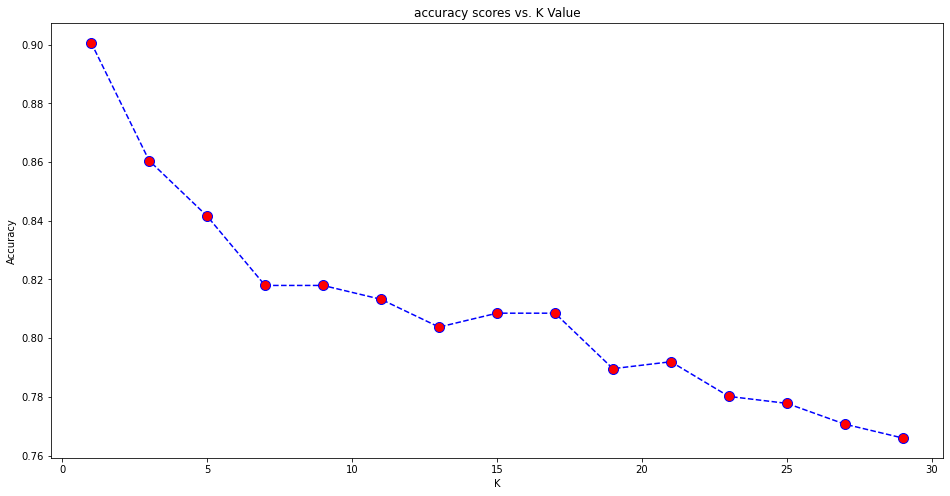

In [19]:
plt.figure(figsize=(16,8))
plt.plot(range(1,30,2),scores,color = 'blue', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('accuracy scores vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [20]:
def model_knn_classifier(X, y, K_value):
    model = KNeighborsClassifier(n_neighbors= K_value)
    model.fit(X, y)
    
    print('1) KNN Classifier accuracy score:')
    y_pred = model.predict(X_test)
    print(metrics.accuracy_score(y_test, y_pred))
    
    print('2) Confusion metrix:')
    predictions_knn = model.predict(X_test)
    confusion_matrix(y_test, predictions_knn)
    
    
    print('3) Classification report') 
    print(classification_report(y_test, model.predict(X_test)))

### Apply into KNN model
Use funtion from .py file

In [22]:
model_knn_classifier(X_train_sm, y_train_sm, 8)

1) KNN Classifier accuracy score:
0.8368794326241135
2) Confusion metrix:
3) Classification report
              precision    recall  f1-score   support

           A       0.97      0.84      0.90       341
           B       0.49      0.80      0.61        54
           C       0.59      0.82      0.69        28

    accuracy                           0.84       423
   macro avg       0.68      0.82      0.73       423
weighted avg       0.88      0.84      0.85       423



### Decision Tree

In [ ]:
def model_decision_tree():
    model = DecisionTreeClassifier()
    model.fit(X_train, y_train)
    print(model.score(X_test, y_test))
    

In [23]:
model = DecisionTreeClassifier()


In [24]:
model.fit(X_train_sm, y_train_sm)


DecisionTreeClassifier()

In [25]:
model.score(X_test, y_test)

0.8747044917257684

In [ ]:
model.feature_importances_


In [26]:
clf = RandomForestClassifier(max_depth = 5, random_state = 0)
clf.fit(X_train_sm, y_train_sm)
print(clf.score(X_test, y_test))

0.8534278959810875
